In [1]:
from collections import defaultdict

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader, TensorDataset, Subset
from torchvision.datasets import MNIST
from torchvision import transforms

In [ ]:
import time
from utils import show_img, extract_patches, display_patches
import inference
from sparseCoding import learn_representations

In [3]:
MEAN = 0.1307
STD = 0.3081
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(MEAN, STD)])
mnist = MNIST(root='./data', train=True, download=True, transform=transform)
train = Subset(mnist, indices=range(len(mnist) // 100))
train_loader = DataLoader(train, batch_size=1, shuffle=False)

SANITY CHECK

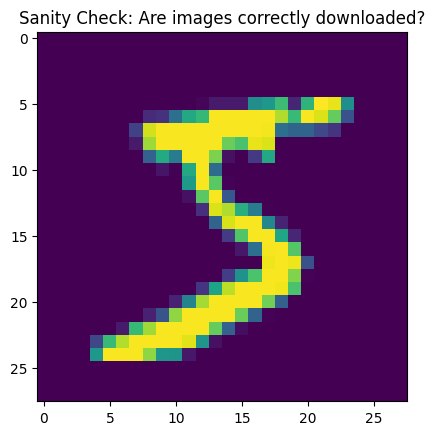

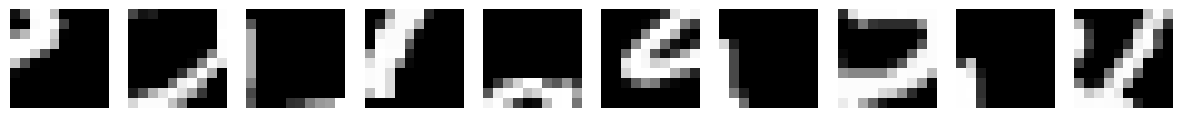

In [4]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
img_grid = torchvision.utils.make_grid(images)
show_img(img_grid, MEAN, STD)
patches = extract_patches(train)
display_patches(patches)

In [ ]:
times = defaultdict(lambda: 0)

for data in train_loader:
    data = data[0].squeeze().flatten()
    D = torch.randn((784, 784))

    start = time.time()
    h1 = inference.ISTA(data, 784, D)
    times['ista'] += time.time() - start

    start = time.time()
    h2 = inference.FISTA(data, 784, D)
    times['fista'] += time.time() - start

    start = time.time()
    h3 = inference.CoD(data, 784, D)
    times['coordinate_descent'] += time.time() - start

print(f"Average time taken in ISTA = {times['ista']/len(train_loader)}")
print(f"Average time taken in FISTA = {times['fista']/len(train_loader)}")
print(f"Average time taken in Coordinate Descent = {times['coordinate_descent']/len(train_loader)}")

In [ ]:
x_dim = 100
hidden_dim = 50
T = 10
NUM_EPOCHS = 20
LEARNING_RATE = 0.001

model = inference.LISTA(T=T, x_dim=x_dim, hidden_dim=hidden_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

model.train()
for epoch in range(NUM_EPOCHS):
    epoch_loss = 0.0
    for x, _ in train_loader:

        z_pred = model(x_batch)
        loss = criterion(z_pred, z_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    if epoch % 100 == 0:
        print(f"Epoch {epoch + 1}/{NUM_EPOCHS}, Loss: {epoch_loss / len(train_loader):.6f}")
